In [1]:
from numpy import linalg
import csv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

Módulos utilizados

Média Amostral
    x1|  2.48,
    x2|  -2.46,
    x3|  0.97


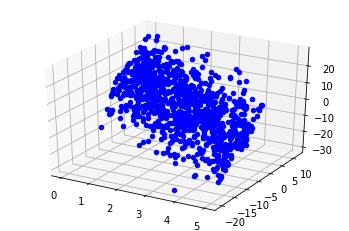

In [2]:
total = 0
x1sum = 0
x2sum = 0
x3sum = 0
with open('dados2.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        x1sum += float(row[0])
        x2sum += float(row[1])
        x3sum += float(row[2])
        total += 1

x1mean = x1sum/total
x2mean = x2sum/total
x3mean = x3sum/total
print('''Média Amostral
    x1|  {0:.2f},
    x2|  {1:.2f},
    x3|  {2:.2f}'''.format(x1mean, x2mean, x3mean))

total = 0
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
with open('dados2-media-nula.csv', 'w') as output:
    with open('dados2.csv') as csvfile:
        content = csv.reader(csvfile, delimiter=',')
        for row in content:
            output.write('{0:.2f},{1:.2f},{2:.2f}\r\n'.format(
                float(row[0]) - x1mean,
                float(row[1]) - x2mean,
                float(row[2]) - x3mean))
            total += 1
            ax.scatter(float(row[0]), float(row[1]), float(row[2]), c='b')

Acima, é informado a Média amostral em um vetor coluna contendo as médias amostrais para as amostras coletadas de **x1**, **x2** e **x3**.

A partir disso, foi escrito um novo arquivo como o nome **dados2-media-nula.csv**, em que se reescreveu todas as amostras coletadas de modo que a média dos novos valores fosse nula, mantendo as distâncias entre os valores. Isso foi feito com a subtração do valor da média amostral de uma variável de seu valor em cada amostra. Isso é feito nas linhas 22 a 30 do Código acima.

A seguir, calculou-se a matriz de covariançia entre as variaveis, utilizando os valores centrados em 0 descritos no arquivo **dados2-media-nula.csv**, no código descrito a seguir.

             X 		 Y 		 Z
        X |2.16,	-4.54,		-8.89
        
        Y |-4.54,	28.99,		48.06
        
        Z |-8.89,	48.06,		89.53
    
[116.92236169   1.21393556   2.54240614]
[[-0.08661088  0.96549938 -0.24557993]
 [ 0.48119186 -0.17530224 -0.85890833]
 [ 0.87232617  0.19256187  0.44940736]]
1
[0.9654993794361116, -0.17530223819844964, 0.19256186951496151]


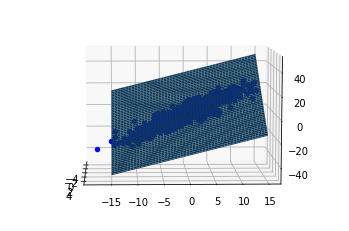

In [12]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
matriz_cov = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
with open('dados2-media-nula.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        x = float(row[0])
        y = float(row[1])
        z = float(row[2])
        ax.scatter(x, y, z, c='b')
        matriz_cov[0][0] += x*x
        matriz_cov[0][1] += x*y
        matriz_cov[0][2] += x*z
        matriz_cov[1][0] += y*x
        matriz_cov[1][1] += y*y
        matriz_cov[1][2] += y*z
        matriz_cov[2][0] += z*x
        matriz_cov[2][1] += z*y
        matriz_cov[2][2] += z*z
    matriz_cov[0][0] = matriz_cov[0][0]/(total-1)
    matriz_cov[0][1] = matriz_cov[0][1]/(total-1)
    matriz_cov[0][2] = matriz_cov[0][2]/(total-1)
    matriz_cov[1][0] = matriz_cov[1][0]/(total-1)
    matriz_cov[1][1] = matriz_cov[1][1]/(total-1)
    matriz_cov[1][2] = matriz_cov[1][2]/(total-1)
    matriz_cov[2][0] = matriz_cov[2][0]/(total-1)
    matriz_cov[2][1] = matriz_cov[2][1]/(total-1)
    matriz_cov[2][2] = matriz_cov[2][2]/(total-1)
print(
    """             X \t\t Y \t\t Z
        X |{0:.2f},\t{1:.2f},\t\t{2:.2f}
        
        Y |{3:.2f},\t{4:.2f},\t\t{5:.2f}
        
        Z |{6:.2f},\t{7:.2f},\t\t{8:.2f}
    """.format(
        matriz_cov[0][0],
        matriz_cov[0][1],
        matriz_cov[0][2],
        matriz_cov[1][0],
        matriz_cov[1][1],
        matriz_cov[1][2],
        matriz_cov[2][0],
        matriz_cov[2][1],
        matriz_cov[2][2])
)
autovalores, autovetores = linalg.eig(matriz_cov)
print(autovalores)
print(autovetores)

point = np.array([0,0,0])
min_index = np.argmin(autovalores)
normal = [autovetores[0][min_index],autovetores[1][min_index],autovetores[2][min_index]]
print(min_index)
print(normal)

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))
xx = np.arange(-5, 5, 0.1)
yy = np.arange(-15, 15, 0.1)
X, Y = np.meshgrid(xx, yy)

# calculate corresponding z
z = autovalores[1]*(-normal[0] * X - normal[1] * Y - d) * 1. /normal[2]

# plot the surface
ax.plot_surface(X, Y, z)
ax.view_init(8, -2)

plt.show()